In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
from keras import layers
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd
from os import listdir
from skimage.util import random_noise

In [3]:
input_img = keras.Input(shape=(256, 256, 3))

# Encoding Part

In [4]:
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)
encoded = x

# Decoding Part

In [5]:
x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(encoded)
x = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# AutoEncoding Model

In [6]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 3)         219   

# Loading Dataset

In [10]:
dogs=[]
i=0
for images in os.listdir('/content/drive/MyDrive/dogs_samples'):
    img=cv2.imread(("/content/drive/MyDrive/dogs_samples//" +images))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if(type(img) == type(None)):
        pass
    else:
        resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
        normalize=(np.asarray(resized).astype('float32')) / 255
        dogs.append(normalize)

In [11]:
dogs=np.array(dogs)
dogs.shape

(1000, 256, 256, 3)

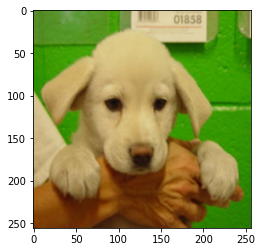

In [12]:
plt.imshow(dogs[400])

# Add Noises To each image

In [13]:
mean=0
var=0.001
sigma=np.sqrt(var)
dogs_noises=dogs.copy()
for i in range(len(dogs)):
  dogs_noises[i]=random_noise(dogs[i], var=sigma**0.45)

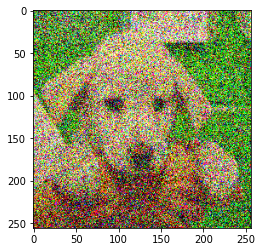

In [14]:
plt.imshow(dogs_noises[400])

In [15]:
autoencoder.fit(dogs_noises,dogs,epochs=150,batch_size=128,shuffle=True)

Epoch 1/150
8/8 [==============================] - 16s 763ms/step - loss: 0.6925
Epoch 2/150
8/8 [==============================] - 3s 406ms/step - loss: 0.6902
Epoch 3/150
8/8 [==============================] - 3s 401ms/step - loss: 0.6853
Epoch 4/150
8/8 [==============================] - 3s 387ms/step - loss: 0.6748
Epoch 5/150
8/8 [==============================] - 3s 409ms/step - loss: 0.6566
Epoch 6/150
8/8 [==============================] - 3s 402ms/step - loss: 0.6359
Epoch 7/150
8/8 [==============================] - 3s 382ms/step - loss: 0.6243
Epoch 8/150
8/8 [==============================] - 3s 384ms/step - loss: 0.6195
Epoch 9/150
8/8 [==============================] - 3s 380ms/step - loss: 0.6155
Epoch 10/150
8/8 [==============================] - 3s 387ms/step - loss: 0.6114
Epoch 11/150
8/8 [==============================] - 3s 388ms/step - loss: 0.6056
Epoch 12/150
8/8 [==============================] - 3s 389ms/step - loss: 0.5956
Epoch 13/150
8/8 [==================

In [16]:
autoencoder.save("autoencoder_64.h5")

In [17]:
decoded_imgs = autoencoder.predict(dogs)

32/32 [==============================] - 2s 37ms/step


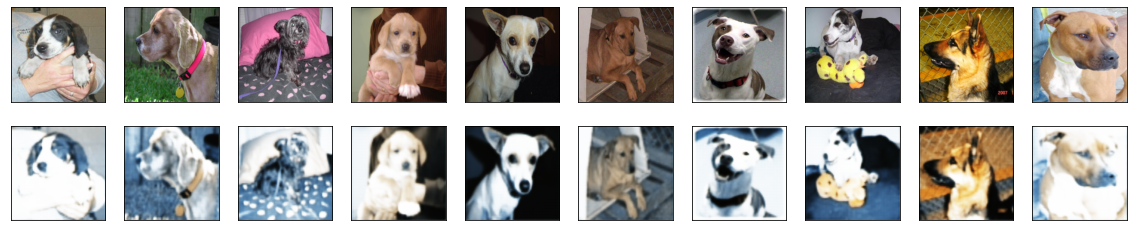

In [18]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(dogs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Test images without Noises

In [19]:
dogs_no_noise=[]
for images in os.listdir('/content/drive/MyDrive/dogs_test'):
    img=cv2.imread(("/content/drive/MyDrive/dogs_test//" +images))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if(type(img) == type(None)):
        pass
    else:
        resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
        normalize=(np.asarray(resized).astype('float32')) / 255
        dogs_no_noise.append(normalize)

In [20]:
dogs_no_noise=np.array(dogs_no_noise)
dogs_no_noise.shape

(10, 256, 256, 3)

In [21]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(dogs_no_noise)

1/1 [==============================] - 0s 178ms/step


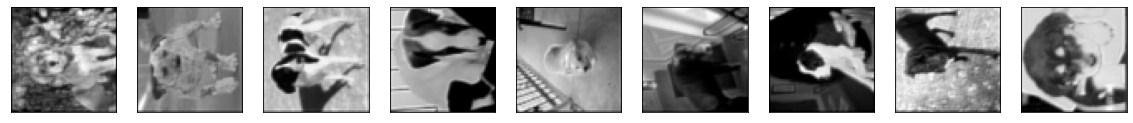

In [22]:
n = 9
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i,:,:,0].T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
encoded_input = keras.Input(shape=(64, 64, 3))

x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(encoded_input)
x = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
last = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.Model(encoded_input, last)
decoder.compile(optimizer='adam', loss='binary_crossentropy')
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 128, 128, 8)      224       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 256, 256, 16)     1168      
 ranspose)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 3)       435       
                                                                 
Total params: 1,827
Trainable params: 1,827
Non-trainable params: 0
_________________________________________________________________


In [33]:
k = 0
for i in range (6,12):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1

In [34]:
decoded_imgs = decoder.predict(encoded_imgs)

1/1 [==============================] - 0s 15ms/step


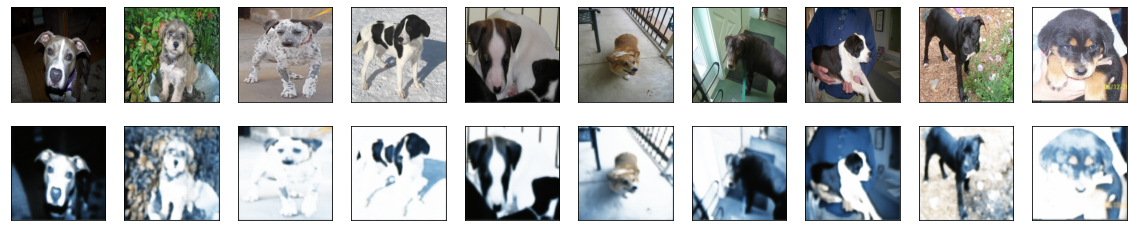

In [35]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(dogs_no_noise[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Test With Noises images

In [36]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(dogs)

32/32 [==============================] - 0s 13ms/step


In [37]:
mean=0
var=0.001
sigma=np.sqrt(var)
encoded_imgs_with_nois=encoded_imgs.copy()
for i in range(len(encoded_imgs)):
  encoded_imgs_with_nois[i]=random_noise(encoded_imgs[i], var=sigma**0.45)

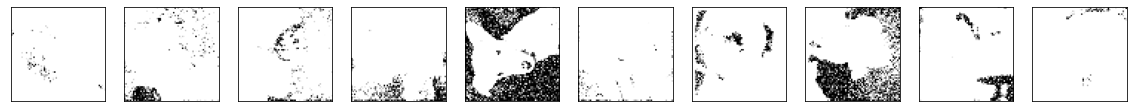

In [38]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs_with_nois[i,:,:,0].T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [39]:
encoded_input = keras.Input(shape=(64, 64, 3))

x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(encoded_input)
x = layers.Conv2DTranspose(16, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
last = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.Model(encoded_input, last)
decoder.compile(optimizer='adam', loss='binary_crossentropy')
decoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 128, 128, 8)      224       
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 256, 256, 16)     1168      
 ranspose)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 3)       435       
                                                                 
Total params: 1,827
Trainable params: 1,827
Non-trainable params: 0
_________________________________________________________________


In [40]:
k = 0
for i in range (6,12):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1

In [41]:
decoded_imgs = decoder.predict(encoded_imgs_with_nois)

32/32 [==============================] - 1s 19ms/step


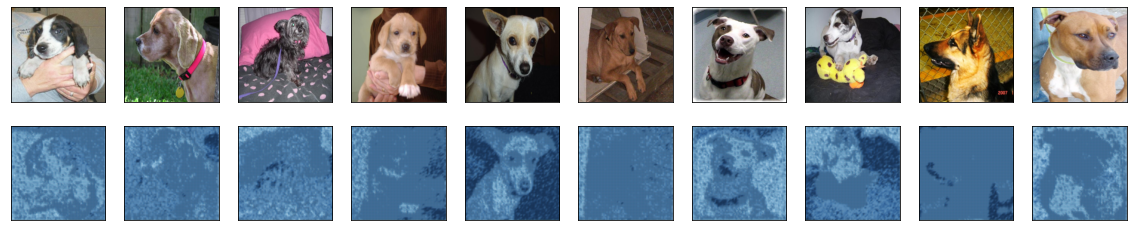

In [42]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(dogs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()